In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### This cell imports necessary Python libraries:

#### numpy (as np) — for numerical operations.

#### pandas (as pd) — for working with dataframes (data tables).

#### seaborn (as sns) — for creating attractive and informative statistical plots.

#### matplotlib.pyplot (as plt) — for general plotting

In [2]:
df=pd.read_csv("C:/Users/salman/Downloads/archive (2)/FIFA - World Cup Summary.csv")

#### Reads the CSV file "FIFA - World Cup Summary.csv" from the specified location into a pandas DataFrame named df.

#### This df will hold all the data used for analysis

In [3]:
print(df.head())

   YEAR         HOST      CHAMPION       RUNNER UP    THIRD PLACE  TEAMS  \
0  1930      Uruguay       Uruguay       Argentina  United States     13   
1  1934        Italy         Italy  Czechoslovakia        Germany     16   
2  1938       France         Italy         Hungary         Brazil     15   
3  1950       Brazil       Uruguay          Brazil         Sweden     13   
4  1954  Switzerland  West Germany         Hungary        Austria     16   

   MATCHES PLAYED  GOALS SCORED  AVG GOALS PER GAME  
0              16            70                 3.6  
1              17            70                 4.1  
2              18            84                 4.7  
3              22            88                 4.0  
4              26           140                 5.4  


#### Displays the first 5 rows of the dataset to give a quick look at the structure and contents.

In [4]:
print(df.tail())

    YEAR          HOST   CHAMPION    RUNNER UP  THIRD PLACE  TEAMS  \
17  2006       Germany      Italy       France      Germany     32   
18  2010  South Africa      Spain  Netherlands      Germany     32   
19  2014        Brazil    Germany    Argentina  Netherlands     32   
20  2018        Russia     France      Croatia      Belgium     32   
21  2022         Qatar  Argentina       France      Croatia     32   

    MATCHES PLAYED  GOALS SCORED  AVG GOALS PER GAME  
17              64           147                 2.3  
18              64           145                 2.3  
19              64           171                 2.7  
20              64           169                 2.6  
21              64           172                 2.7  


#### Displays the last 5 rows of the dataset to see how the data ends and check for consistency or unusual values.

In [5]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                22 non-null     int64  
 1   HOST                22 non-null     object 
 2   CHAMPION            22 non-null     object 
 3   RUNNER UP           22 non-null     object 
 4   THIRD PLACE         22 non-null     object 
 5   TEAMS               22 non-null     int64  
 6   MATCHES PLAYED      22 non-null     int64  
 7   GOALS SCORED        22 non-null     int64  
 8   AVG GOALS PER GAME  22 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.7+ KB
None


### Prints a summary of the DataFrame:

#### Column names

#### Number of non-null entries

#### Data types of each column

#### Memory usage

#### Helps in understanding data completeness and types for further processing.

In [6]:
print(df.describe())

              YEAR      TEAMS  MATCHES PLAYED  GOALS SCORED  \
count    22.000000  22.000000       22.000000     22.000000   
mean   1978.909091  22.227273       43.727273    123.636364   
std      27.738419   7.602830       17.776876     34.841882   
min    1930.000000  13.000000       16.000000     70.000000   
25%    1959.000000  16.000000       32.000000     90.500000   
50%    1980.000000  20.000000       45.000000    129.000000   
75%    2001.000000  32.000000       64.000000    146.750000   
max    2022.000000  32.000000       64.000000    172.000000   

       AVG GOALS PER GAME  
count           22.000000  
mean             3.059091  
std              0.831327  
min              2.200000  
25%              2.600000  
50%              2.700000  
75%              3.450000  
max              5.400000  


### Displays statistical summary of numeric columns (e.g., count, mean, std dev, min, max, etc.).

### Useful to understand distribution and range of data.

In [7]:
print(df.isnull().sum())

YEAR                  0
HOST                  0
CHAMPION              0
RUNNER UP             0
THIRD PLACE           0
TEAMS                 0
MATCHES PLAYED        0
GOALS SCORED          0
AVG GOALS PER GAME    0
dtype: int64


#### Shows the number of missing (NaN) values in each column.
#### Helps in identifying data that may need cleaning.

In [8]:
df.drop_duplicates(inplace=True)

#### Removes any duplicate rows in the dataset.

#### inplace=True makes the change directly in df

In [9]:
most_wins=df['CHAMPION'].value_counts()
print("country that has highest winnings:\n",most_wins)

country that has highest winnings:
 CHAMPION
Brazil          5
Italy           4
West Germany    3
Argentina       3
Uruguay         2
France          2
England         1
Spain           1
Germany         1
Name: count, dtype: int64


#### Counts how many times each country has won the World Cup.
#### Displays the number of championships per country

In [10]:
high_goals=df['GOALS SCORED'].value_counts()
print("Highest goal score:\n",high_goals)

Highest goal score:
 GOALS SCORED
70     2
89     2
171    2
132    1
169    1
145    1
147    1
161    1
141    1
115    1
146    1
84     1
102    1
97     1
95     1
126    1
140    1
88     1
172    1
Name: count, dtype: int64


#### Counts how often each goal score appears in the dataset.

#### Useful for identifying years with unusually high or low scoring.

In [11]:
#No. of time does the host won
df[df['HOST']==df['CHAMPION']].shape[0]

6

#### Filters rows where the host country also became the champion.
#### shape[0] gives the number of such occurrences 

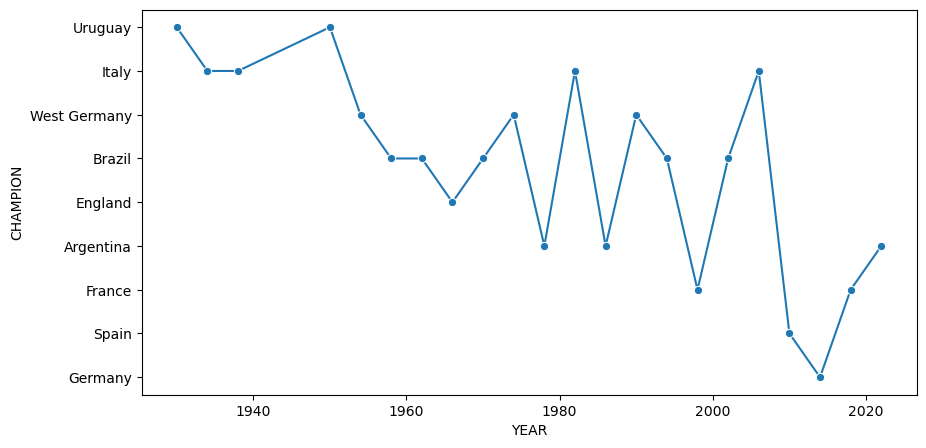

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="YEAR",y="CHAMPION",marker='o')
plt.show()

#### Tries to draw a line plot between year and champion.
#### ⚠️ Again, not ideal as CHAMPION is not numeric

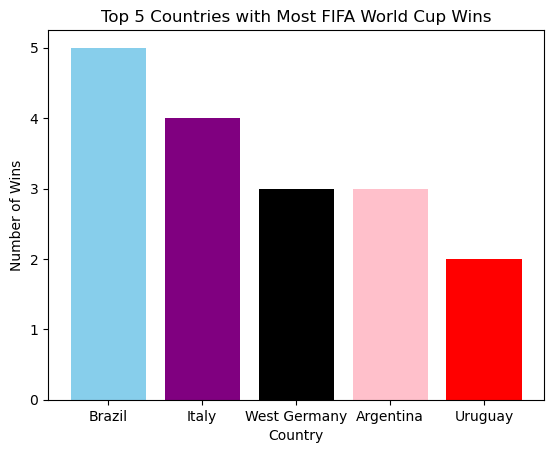

In [13]:
#most world cup wins
wins = df['CHAMPION'].value_counts().head(5)
plt.bar(wins.index, wins.values, color=['skyblue','purple','black','pink','red'])
plt.title('Top 5 Countries with Most FIFA World Cup Wins')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.show()

#### Displays a bar chart of top 5 winning countries.

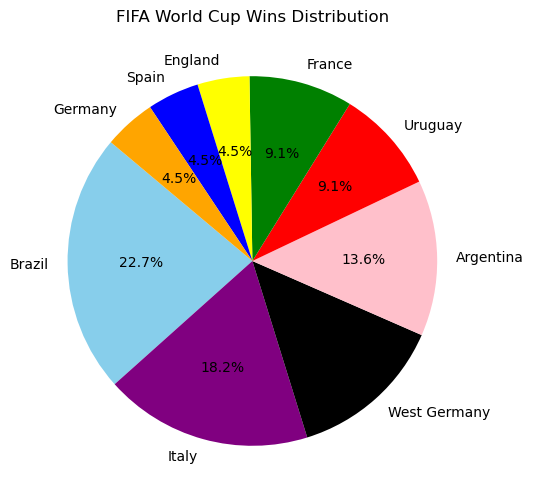

In [14]:
#distribution of champions
wins_all = df['CHAMPION'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(wins_all, labels=wins_all.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','purple','black','pink','red','green','yellow','blue','orange'])
plt.title('FIFA World Cup Wins Distribution')
plt.show()

#### Shows a pie chart of how World Cup wins are distributed across countries

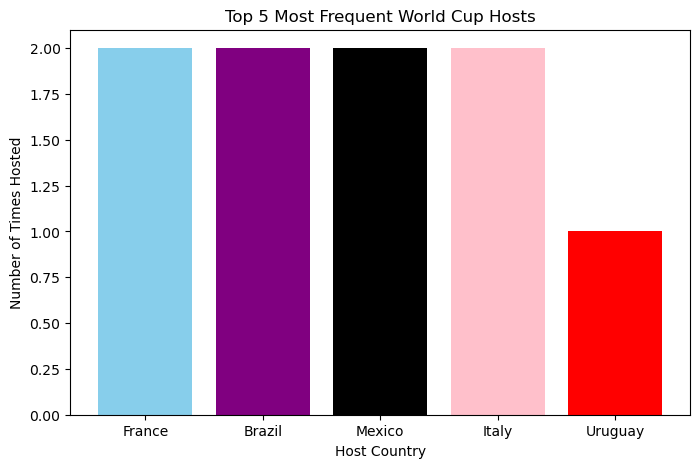

In [15]:
#most frequent host countries
host_counts = df['HOST'].value_counts().head(5)

plt.figure(figsize=(8,5))
plt.bar(host_counts.index, host_counts.values, color=['skyblue','purple','black','pink','red'])
plt.title('Top 5 Most Frequent World Cup Hosts')
plt.xlabel('Host Country')
plt.ylabel('Number of Times Hosted')
plt.show()


#### Bar chart of countries that hosted the World Cup most frequently.

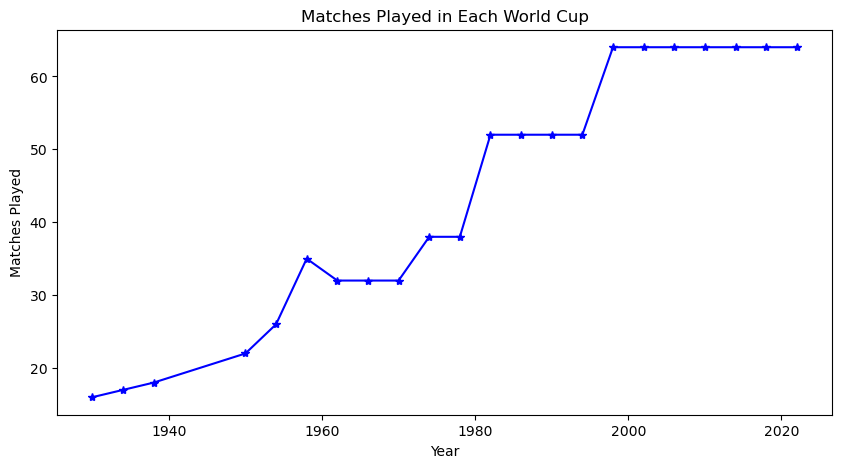

In [16]:
#MATCHES PLAYED OVER YEAR
plt.figure(figsize=(10,5))
plt.plot(df['YEAR'], df['MATCHES PLAYED'], color='blue',marker='*')
plt.title('Matches Played in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.show()

#### Line chart showing how many matches were played each year.

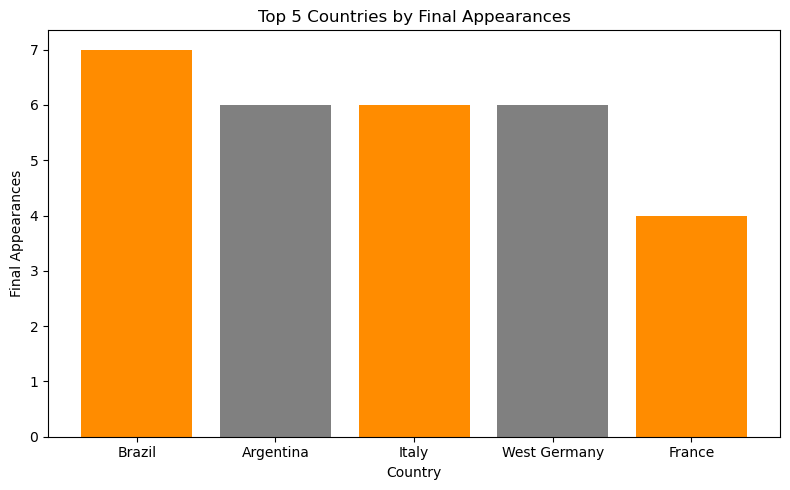

In [17]:
#top 5 countries appeared in  finals + runner up
finals_appearance = df['CHAMPION'].value_counts() + df['RUNNER UP'].value_counts()
finals_appearance = finals_appearance.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.bar(finals_appearance.index, finals_appearance.values, color=['darkorange','gray','darkorange','gray','darkorange'])
plt.title('Top 5 Countries by Final Appearances')
plt.xlabel('Country')
plt.ylabel('Final Appearances')
plt.tight_layout()
plt.show()

#### Combines counts of champions and runners-up.
#### Shows which countries appeared in finals most often.


Columns: Index(['YEAR', 'HOST', 'CHAMPION', 'RUNNER_UP', 'THIRD_PLACE', 'TEAMS',
       'MATCHES_PLAYED', 'GOALS_SCORED', 'AVG_GOALS_PER_GAME'],
      dtype='object')


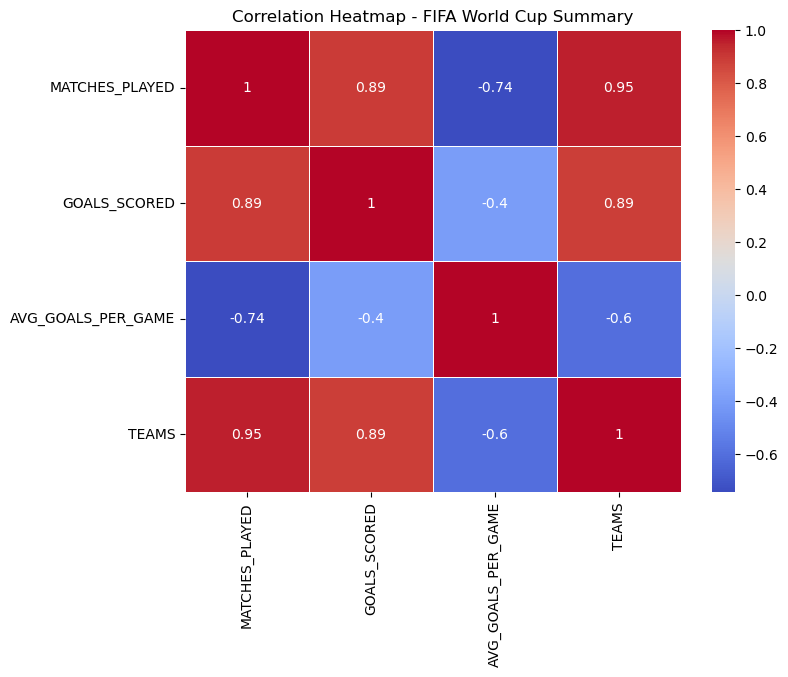

In [18]:
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')

# View cleaned column names
print("Columns:", df.columns)

# Select only numeric columns for correlation
numeric_cols = ['MATCHES_PLAYED', 'GOALS_SCORED', 'AVG_GOALS_PER_GAME', 'TEAMS']
subset_df = df[numeric_cols]

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - FIFA World Cup Summary")
plt.show()

#### A correlation heatmap is a visual representation of how closely related two numerical variables are.
#### Cleans column names to uppercase and replaces spaces with underscores.
#### Then plots a correlation heatmap for numeric features.

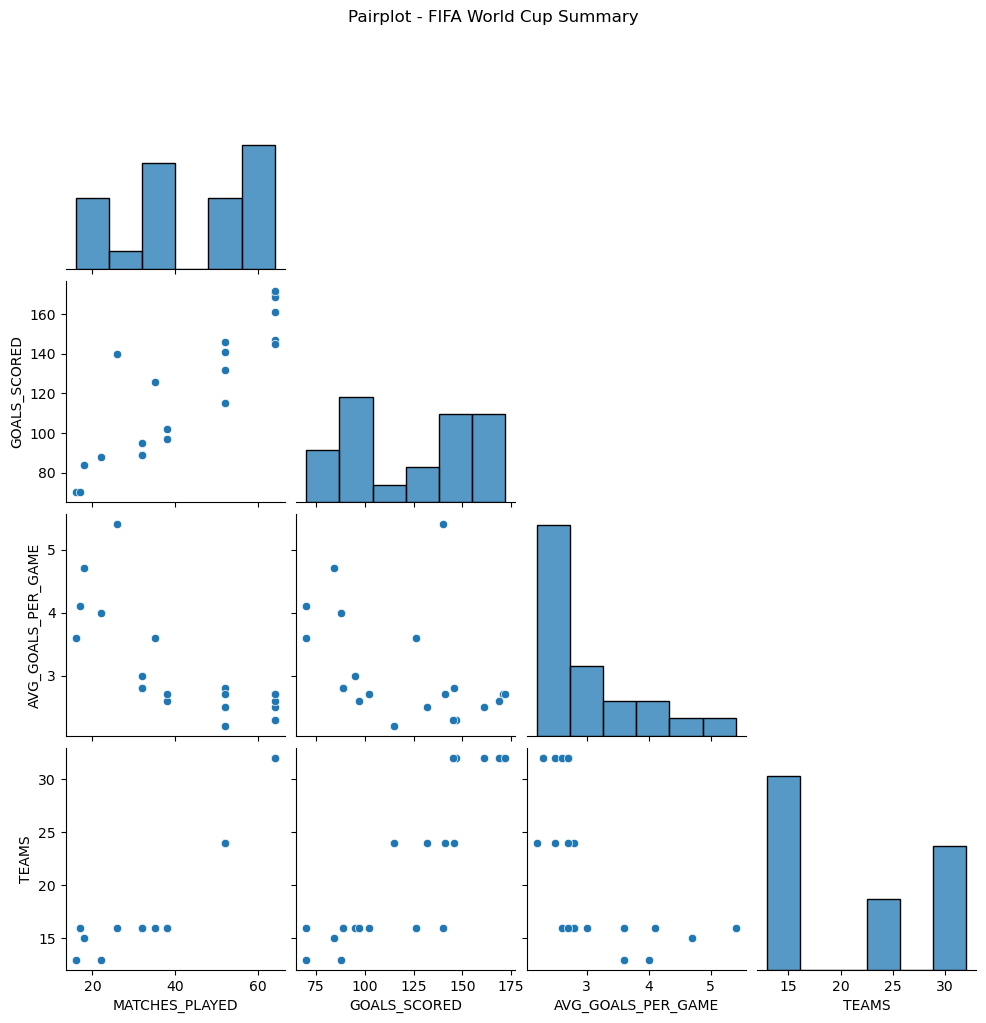

In [19]:
numeric_cols = ['MATCHES_PLAYED', 'GOALS_SCORED', 'AVG_GOALS_PER_GAME', 'TEAMS']
subset_df = df[numeric_cols]
sns.pairplot(subset_df, corner=True)
plt.suptitle("Pairplot - FIFA World Cup Summary", y=1.02)
plt.show()

#### A pairplot is a grid of plots that lets you visually explore the relationships between all pairs of numeric features in a dataset
#### Generates a pairplot to visually explore relationships between numeric columns.
### 1.Selects a subset of the dataset with only 4 numeric columns:
#### MATCHES_PLAYED
#### GOALS_SCORED
#### AVG_GOALS_PER_GAME
#### TEAMS
### 2. Creates a pairplot:
#### Using seaborn.pairplot(), a grid of plots is created.
#### Each subplot shows the relationship between two variables.
#### corner=True shows only the lower triangle of plots to avoid repetition (optional aesthetic).
### 3. Adds a Title:
#### plt.suptitle() puts a main title on the whole grid of plots.